In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

CONCISE = False
TEST_RATIO = 0.10

# Load the dataset
filename = 'troop_movements.csv'
data = pd.read_csv(filename)
df = pd.DataFrame(data)

# # Clean data
# df = df[df['unit_type'] != 'unknown']

if CONCISE:
    display(df.head())
else:
    display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-08 15:31:47,1,at-at,resistance,4,1,9,5,Kashyyyk
1,2025-07-08 15:31:46,2,tie_fighter,resistance,7,10,4,6,Tatooine
2,2025-07-08 15:31:45,3,unknown,empire,9,2,2,8,Umbara
3,2025-07-08 15:31:44,4,at-st,empire,1,5,6,6,Stewjon
4,2025-07-08 15:31:43,5,stormtrooper,resistance,3,2,8,5,Troiken
...,...,...,...,...,...,...,...,...,...
995,2025-07-08 15:15:12,996,at-at,resistance,3,7,7,3,Umbara
996,2025-07-08 15:15:11,997,unknown,resistance,5,6,1,2,Tholoth
997,2025-07-08 15:15:10,998,tie_fighter,resistance,1,6,8,10,Chandrila
998,2025-07-08 15:15:09,999,resistance_soldier,resistance,10,10,6,1,Umbara


In [45]:
count_by_alignment = df.groupby('empire_or_resistance').size().reset_index(name='count')
display(count_by_alignment)

,empire_or_resistance,count
0,empire,486
1,resistance,514


In [46]:
count_by_homeworld = df.groupby('homeworld').size().reset_index(name='count')
if CONCISE:
    display(count_by_homeworld.head())
else:
    display(count_by_homeworld)
    print(np.sum(count_by_homeworld['count']))

,homeworld,count
0,Alderaan,21
1,Aleen Minor,27
2,Bestine IV,25
3,Cerea,21
4,Champala,22
5,Chandrila,25
6,Concord Dawn,21
7,Corellia,28
8,Dagobah,27
9,Dathomir,25


1000


In [47]:
count_by_unit_type = df.groupby('unit_type').size().reset_index(name='count')
if CONCISE:
    display(count_by_unit_type.head())
else:
    display(count_by_unit_type)
    print(np.sum(count_by_unit_type['count']))

,unit_type,count
0,at-at,130
1,at-st,122
2,resistance_soldier,114
3,stormtrooper,118
4,tie_fighter,120
5,tie_silencer,120
6,unknown,139
7,x-wing,137


1000


In [48]:
df['is_resistance'] = (df['empire_or_resistance'] == 'resistance')
if CONCISE:
    display(df.head())
else:
    display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-08 15:31:47,1,at-at,resistance,4,1,9,5,Kashyyyk,True
1,2025-07-08 15:31:46,2,tie_fighter,resistance,7,10,4,6,Tatooine,True
2,2025-07-08 15:31:45,3,unknown,empire,9,2,2,8,Umbara,False
3,2025-07-08 15:31:44,4,at-st,empire,1,5,6,6,Stewjon,False
4,2025-07-08 15:31:43,5,stormtrooper,resistance,3,2,8,5,Troiken,True
...,...,...,...,...,...,...,...,...,...,...
995,2025-07-08 15:15:12,996,at-at,resistance,3,7,7,3,Umbara,True
996,2025-07-08 15:15:11,997,unknown,resistance,5,6,1,2,Tholoth,True
997,2025-07-08 15:15:10,998,tie_fighter,resistance,1,6,8,10,Chandrila,True
998,2025-07-08 15:15:09,999,resistance_soldier,resistance,10,10,6,1,Umbara,True


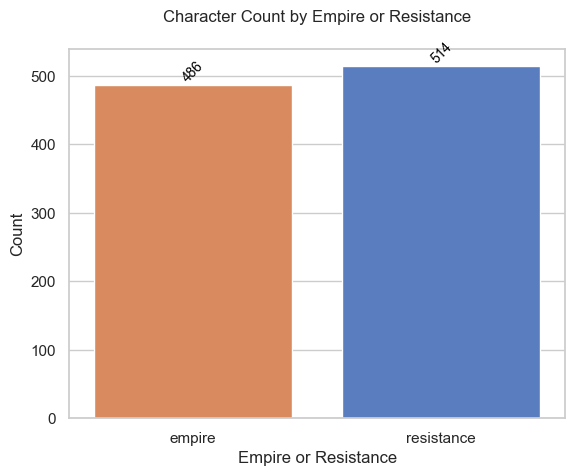

In [49]:
sns.set_theme(style="whitegrid")
sns_palette = sns.color_palette('muted')

ax =  sns.barplot(x="empire_or_resistance", y="count", palette=[sns_palette[1], sns_palette[0]],
                  hue="empire_or_resistance", data=count_by_alignment)
plt.title("Character Count by Empire or Resistance", y=1.05)
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                rotation=45,
                xytext=(0, 10), textcoords='offset points')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = df[['unit_type', 'homeworld']]
X_enc = pd.get_dummies(X)
y = df['is_resistance']

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=TEST_RATIO, random_state=42)

# Train the classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict alignment for test set
y_pred = clf.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.66


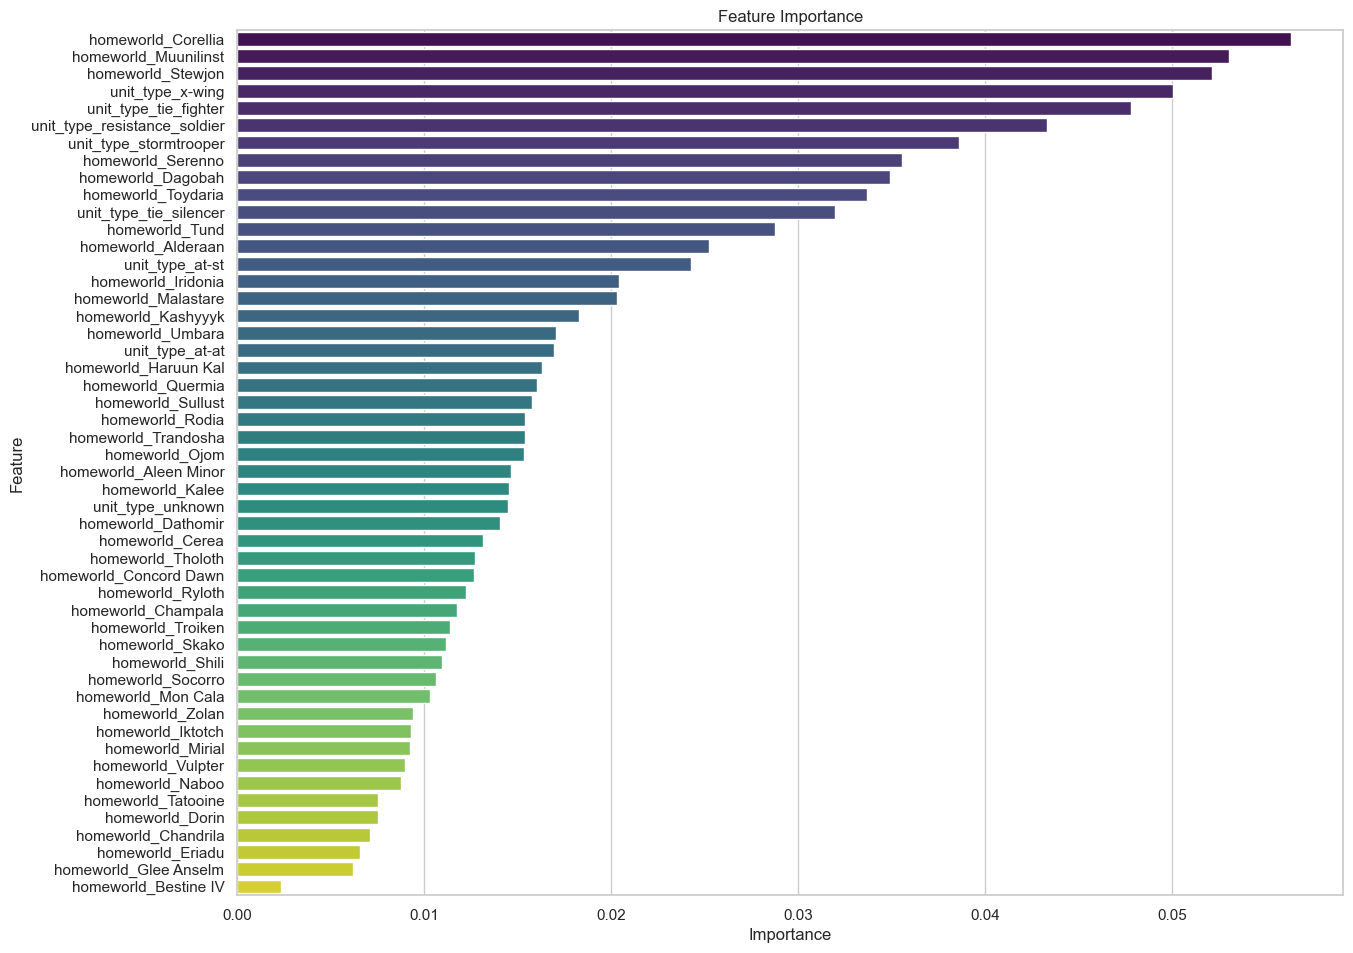

Most Influential Unit Type: homeworld_Corellia


In [51]:
# Convert categorical features to numeric using pd.get_dummies
X_enc = pd.get_dummies(X)

# Create a bar plot that shows feature importance

importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature' : X_enc.columns,
    'Importance' : importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout(pad=-10.0)
plt.show()

# Save the model as trained_model.pkl
import pickle
model_filename = 'trained_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(clf, model_file)

# Most Influential Features
print("Most Influential Unit Type:", feature_importances['Feature'].iloc[0])